# Communities

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as colors


In [2]:
# Load data

edge_df = pd.read_csv("data/edges.csv", delimiter=",")
node_df = pd.read_csv("data/nodes.csv", delimiter=",")

G = nx.from_pandas_edgelist(edge_df, source="# source", target=" target", create_using=nx.Graph())

In [3]:
from networkx.algorithms.community import asyn_lpa_communities, label_propagation_communities

In [4]:


asyn_lpa_communities(G)

<generator object asyn_lpa_communities at 0x7fcb71d45f90>

In [5]:
largest_cc = max(nx.connected_components(G), key=len)
LG = G.subgraph(largest_cc)
partition_LG = asyn_lpa_communities(LG)
type(partition_LG)

nx.number_of_nodes(LG)
nx.number_of_edges(LG)

13428

In [6]:
partition = label_propagation_communities(LG)
len(partition)

625

COMMUNITY LAYOUT: Datashader not found, edge bundling not available
Metagraph is a Graph with 65 nodes and 477 edges
100%|██████████| 65/65 [00:01<00:00, 64.10it/s]


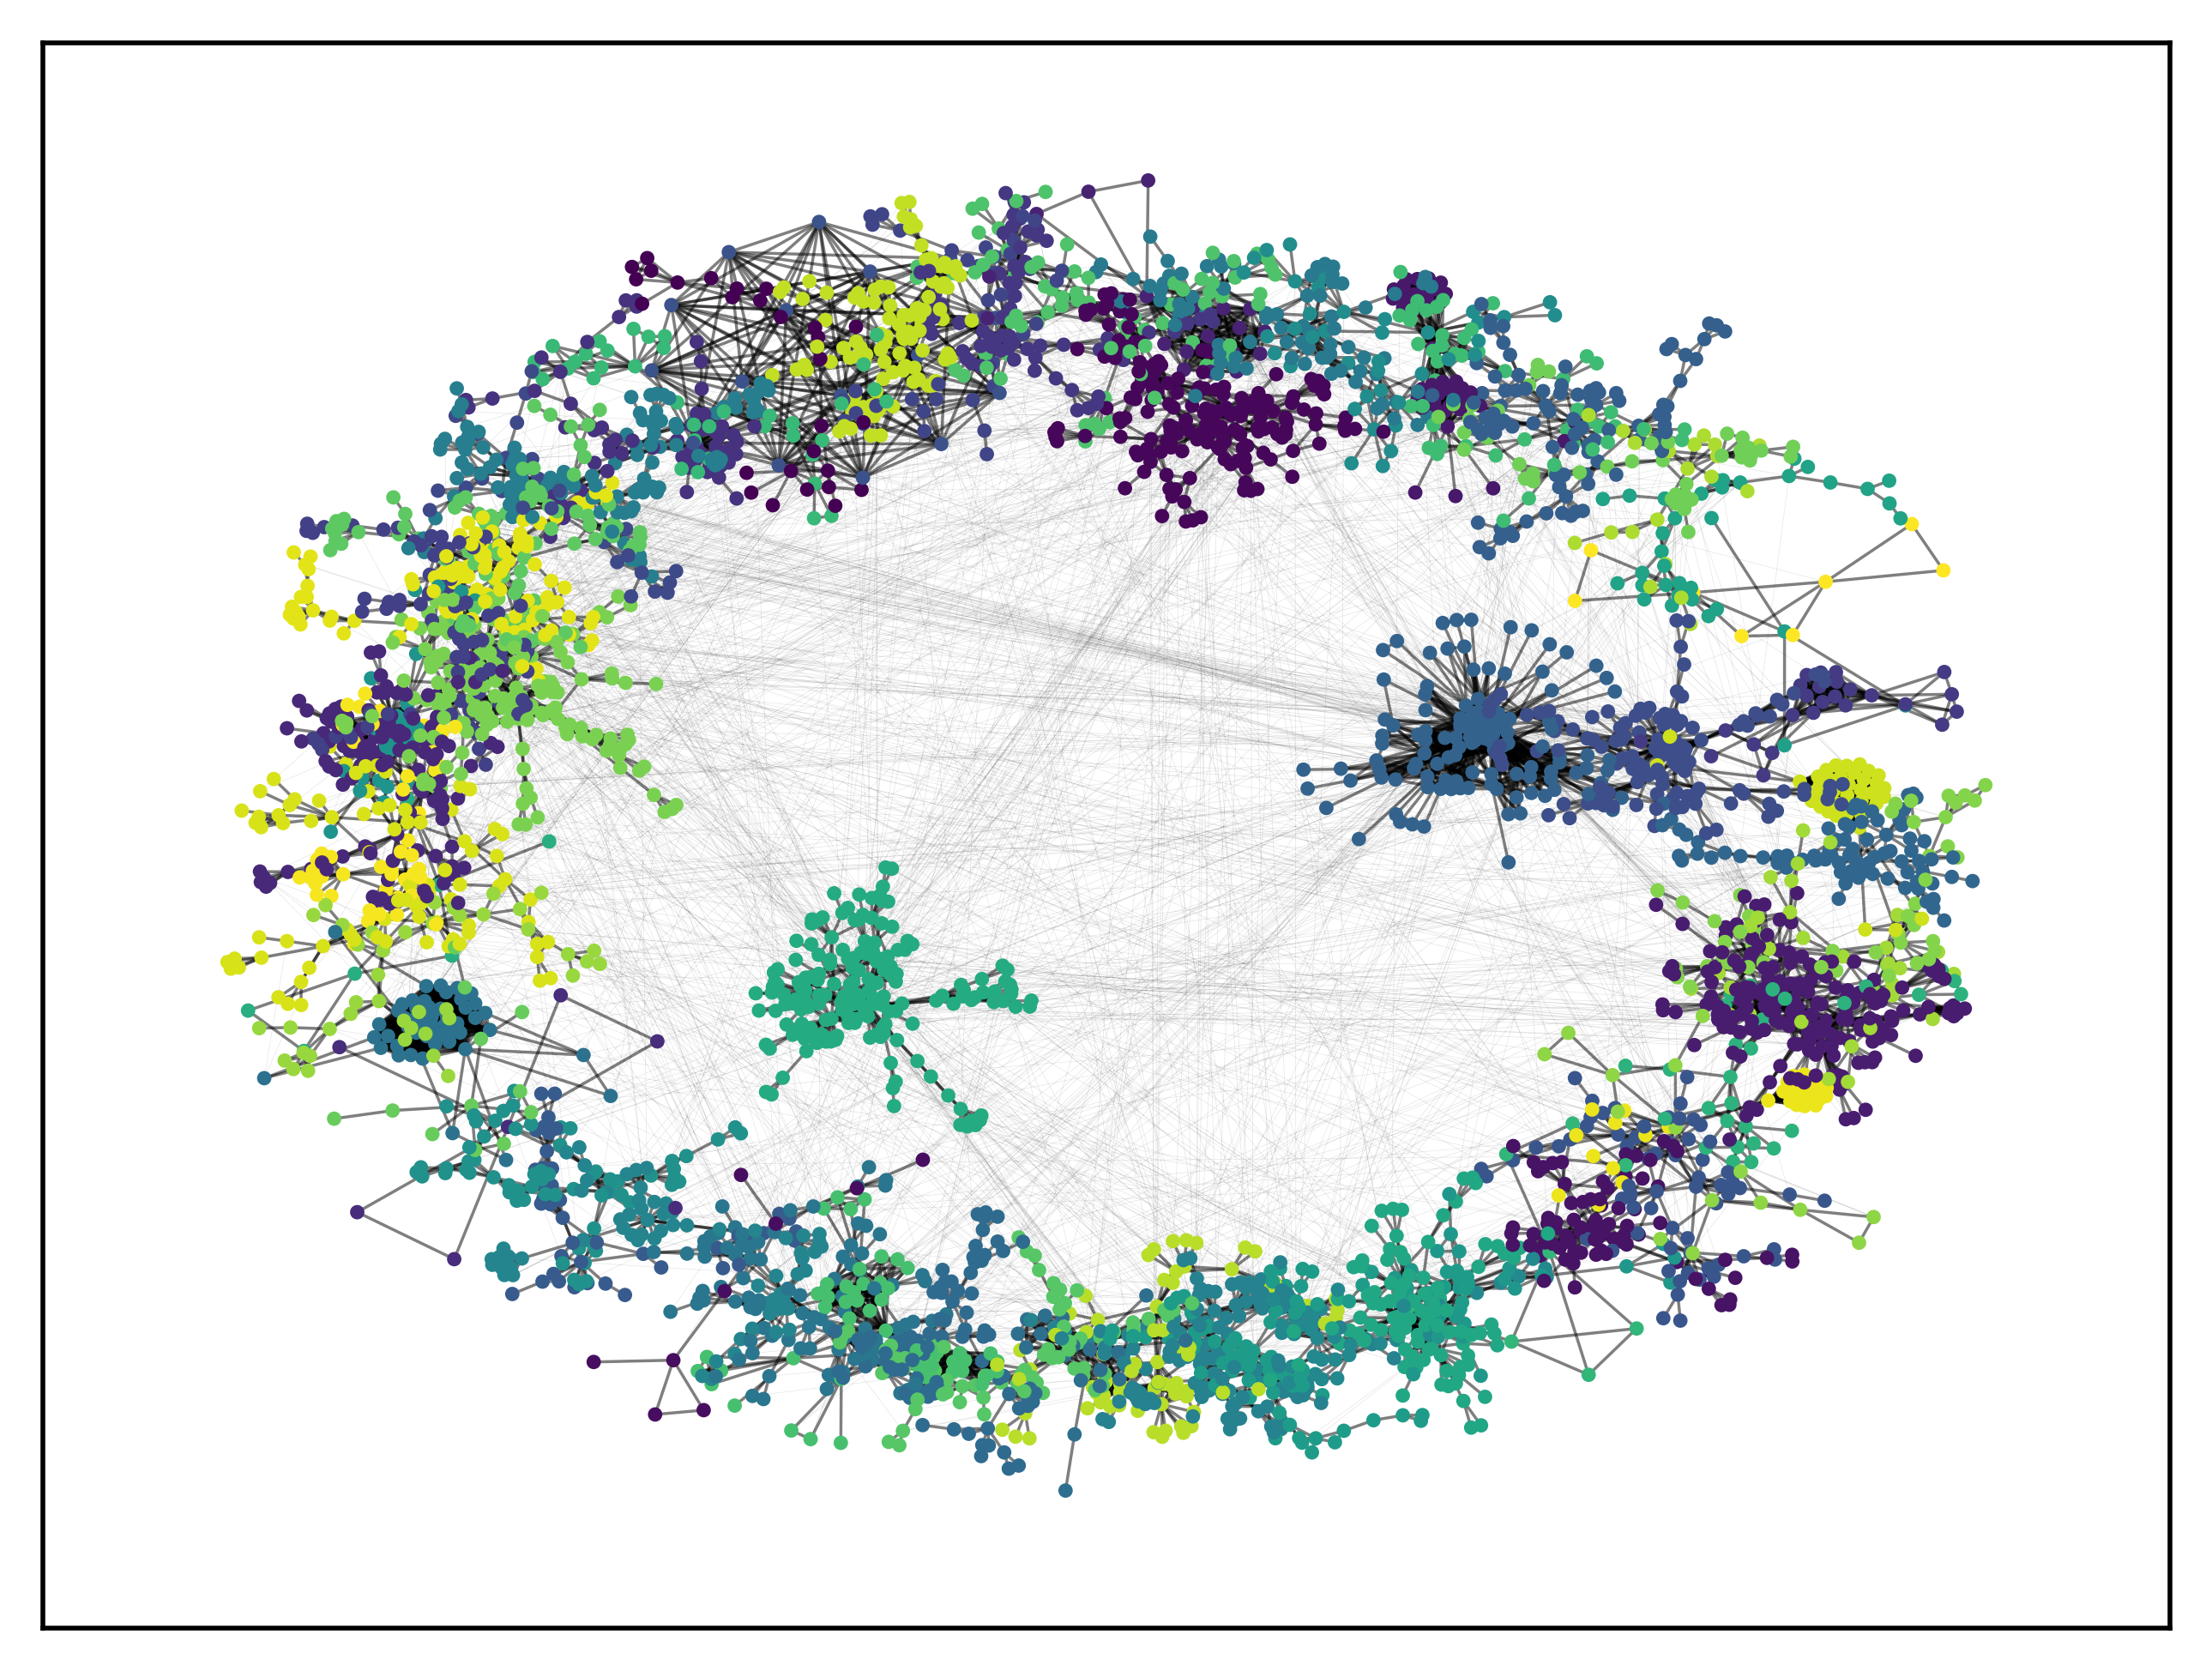

In [7]:
from scripts.layout_class import CommunityLayout
from networkx.algorithms import community

LG2 = nx.Graph(LG)
layout = CommunityLayout(LG2,
                community_compression = 0.25,
                layout_algorithm = nx.spring_layout,
                layout_kwargs = {"k":75, "iterations":1000},
                community_algorithm = community.louvain_communities,
                community_kwargs = {"resolution":2})
layout.display()


In [8]:
#%%script echo skipping
# create a modular graph
from netgraph import Graph
#partition_sizes = [10, 20, 30, 40]
#g = nx.random_partition_graph(partition_sizes, 0.5, 0.1)

# since we created the graph, we know the best partition:
#node_to_community = dict()
#node = 0
#for community_id, size in enumerate(partition_sizes):
#    for _ in range(size):
#        node_to_community[node] = community_id
#        node += 1

# # alternatively, we can infer the best partition using Louvain:
node_to_community = louvain_partitions(LG)

node_to_community = list(node_to_community)

print(node_to_community)
np.random.seed(321)
colors_idxs = {i: name for i, name in enumerate([name for name, he in mcolors.cnames.items()])}
colors_idxs
n_colors = dict(enumerate(np.random.choice(list(colors_idxs.values()),size=42).flatten(), 0))
#n_colors

#community_to_color = n_colors

#node_color = {node: community_to_color[community_id] for node, community_id in node_to_community.items()}
#node_color
#Graph(g,
#      node_color=node_color, node_edge_width=0, edge_alpha=0.1,
#      node_layout='community', node_layout_kwargs=dict(node_to_community=node_to_community),
#      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
#)

#plt.show()
#plt.savefig("figures/communities1.png")

NameError: name 'louvain_partitions' is not defined

<generator object louvain_partitions at 0x7f44534686d0>


In [ ]:
from networkx.algorithms import community
len(list(community.asyn_lpa_communities(LG)))


663

In [ ]:
louvain = list(community.louvain_communities(LG, seed=10))
print(len(louvain))


41


{0: 'darkgrey',
 1: 'salmon',
 2: 'darkorchid',
 3: 'deepskyblue',
 4: 'whitesmoke',
 5: 'navy',
 6: 'lightgreen',
 7: 'limegreen',
 8: 'silver',
 9: 'darkkhaki',
 10: 'darkgrey',
 11: 'plum',
 12: 'cadetblue',
 13: 'dimgrey',
 14: 'khaki',
 15: 'teal',
 16: 'rebeccapurple',
 17: 'greenyellow',
 18: 'darkseagreen',
 19: 'yellow',
 20: 'aquamarine',
 21: 'burlywood',
 22: 'chartreuse',
 23: 'peru',
 24: 'blueviolet',
 25: 'antiquewhite',
 26: 'aliceblue',
 27: 'azure',
 28: 'lightsalmon',
 29: 'palevioletred',
 30: 'slateblue',
 31: 'coral',
 32: 'lavender',
 33: 'darkorange',
 34: 'mediumseagreen',
 35: 'slategray',
 36: 'dimgrey',
 37: 'turquoise',
 38: 'darkslategrey',
 39: 'aliceblue',
 40: 'thistle',
 41: 'blueviolet'}

In [ ]:
import numpy as np

lens = []
for i in louvain:
    lens.append(len(i))
print("smallest community: ", np.min(lens), "Largest community: ", np.max(lens))

smallest community:  7 Largest community:  234


Degree Assortativity

In [ ]:
#the similarity of connections in the graph with respect to the node degree
nx.degree_assortativity_coefficient(LG)

#the average degree of the 'area' in which a certain node resides
nx.average_neighbor_degree(LG)



{22: 4.0,
 106: 11.75,
 11183: 5.0,
 15793: 6.0,
 19440: 4.0,
 22618: 4.25,
 25043: 3.8,
 24: 4.25,
 3858: 5.25,
 15774: 4.0,
 19517: 9.0,
 23161: 5.25,
 26: 17.6,
 1407: 15.833333333333334,
 4550: 9.80952380952381,
 11801: 10.909090909090908,
 13096: 13.909090909090908,
 13142: 10.321428571428571,
 27: 5.0,
 11114: 5.0,
 19081: 5.0,
 24726: 5.0,
 25540: 4.375,
 29: 4.0,
 20243: 3.25,
 45: 50.46938775510204,
 570: 50.895833333333336,
 773: 46.58181818181818,
 1186: 30.058823529411764,
 1653: 44.875,
 2212: 51.851063829787236,
 2741: 42.90769230769231,
 2952: 53.955555555555556,
 3372: 50.48979591836735,
 4164: 45.7962962962963,
 4180: 30.833333333333332,
 4511: 51.46666666666667,
 4513: 54.48837209302326,
 6179: 52.78260869565217,
 6610: 40.720588235294116,
 6830: 53.955555555555556,
 7956: 45.94642857142857,
 8879: 53.955555555555556,
 9785: 40.5735294117647,
 11241: 50.42857142857143,
 11472: 53.955555555555556,
 12365: 36.76623376623377,
 12496: 51.458333333333336,
 12679: 48.5,
 12